In [743]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [744]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()    

In [745]:
def checkCorrFF(df):
    plt.figure(figsize=(12,10))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

In [746]:
def checkCorrFT(df, target):
    sns.pairplot(df, hue = target)

In [747]:
def checkYesNo(df, col:str, colTarget:str):
    checkdf = df.loc[df[col] == colTarget]
    return checkdf['y'].value_counts()

# 6 13 16

In [748]:
df = pd.read_csv('HWdata/bank/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


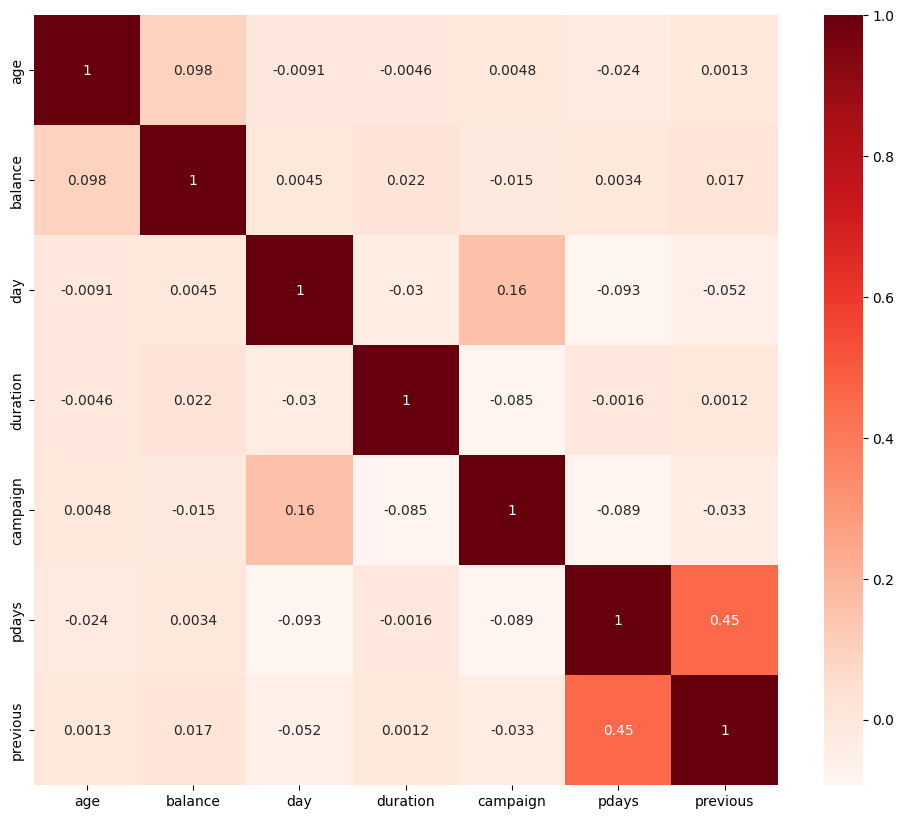

In [749]:
checkCorrFF(df)

In [750]:
# Drop features w/ high correlation
df.drop(columns=['pdays','balance','day','month','duration','contact'], inplace=True)

### Check 'education' feature and manage unknown data

In [751]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [752]:
# Replace unknown education with most common
df['education'] = df['education'].replace({'unknown':'secondary'})
df['education'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

### Check 'job' feature and manage unknown data

In [753]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [754]:
# Remove unknown data since it is a small portion of the data
df.drop(df[df['job'] == 'unknown'].index, inplace=True)

### Check 'poutcome' feature and manage unknown data

In [755]:
df['poutcome'].value_counts()

unknown    36704
failure     4881
other       1838
success     1500
Name: poutcome, dtype: int64

In [756]:
# Drop poutcome since it is mostly unknown
df.drop(columns=['poutcome'], inplace=True)

### Transform Categorical Data using One-hot Encoding

In [757]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x = pd.get_dummies(x)

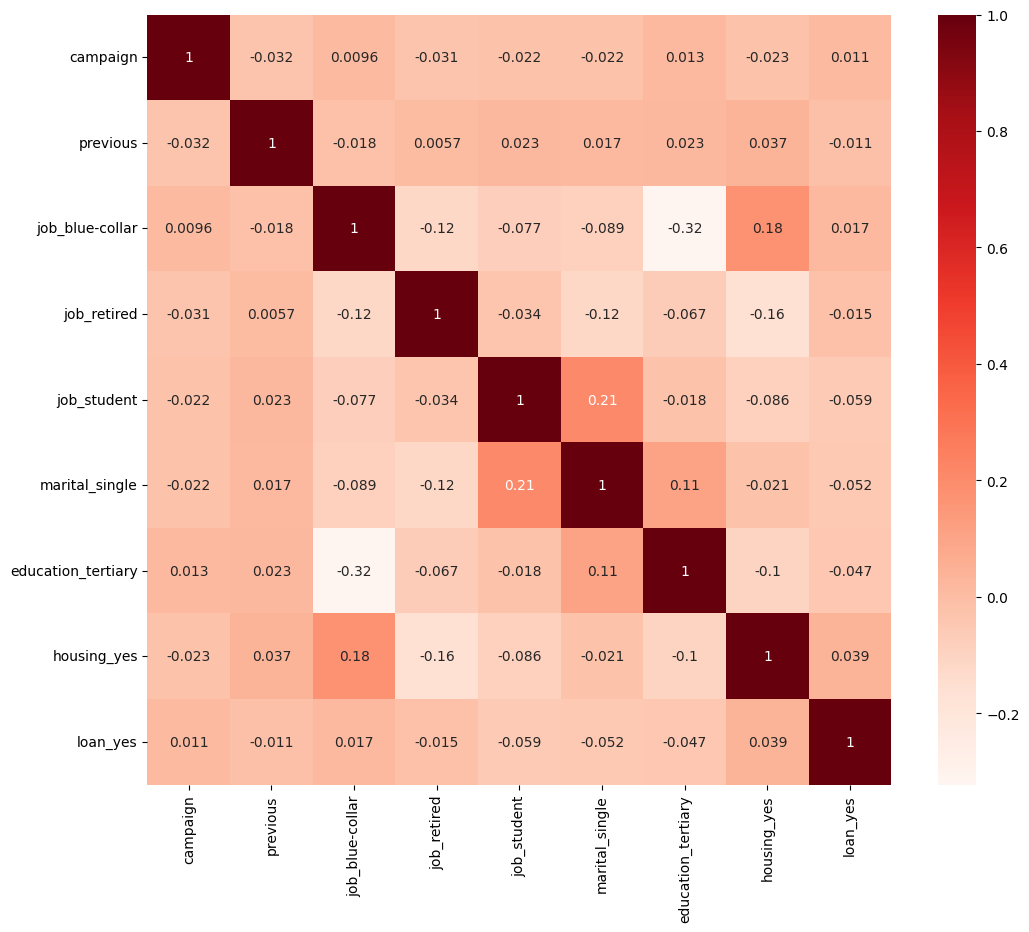

In [758]:
selector = SelectKBest(chi2, k=10)
df_new = selector.fit(x, y)

col = selector.get_support(indices=True)
df_new = x.iloc[:,col]

df_new = df_new.drop(columns=['housing_no'])

checkCorrFF(df_new)

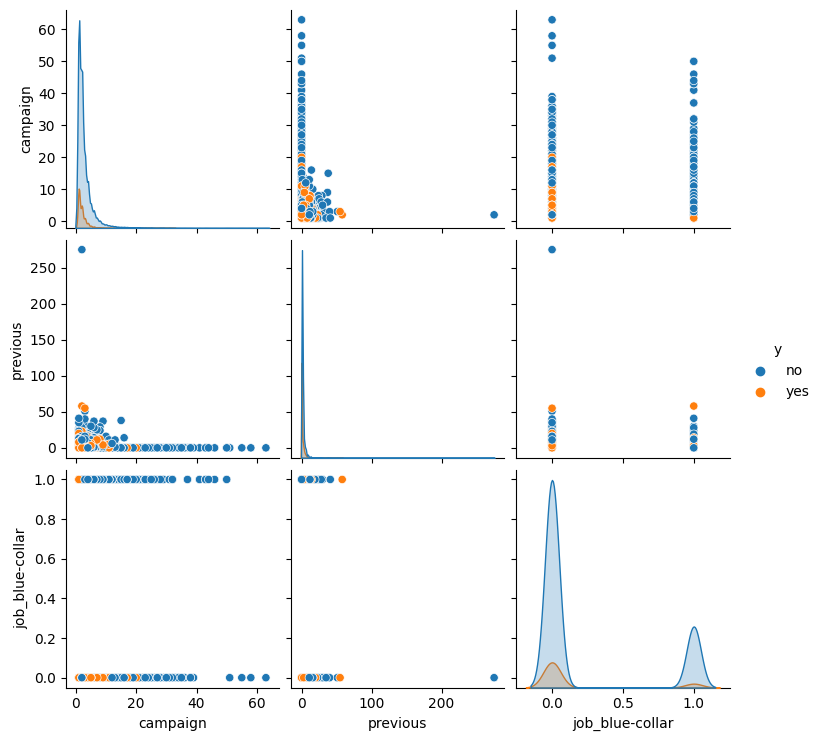

In [764]:
df_new = pd.concat([df_new, y], axis=1)
# df_new
# checkCorrFT(df_new.iloc[:,lambda x: [0,1,2,-1]], 'y')

In [ ]:
# # Drop No outlier
# df = df.drop(df[df['campaign'] >= 40].index)
# df['campaign'].value_counts()

# # Drop Yes outlier
# cp20up = df[df['campaign'] > 18]
# df = df.drop(cp20up[cp20up['y'] == 'yes'].index)

In [ ]:
df['campaign'].describe()

count    44923.000000
mean         2.760345
std          3.092838
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

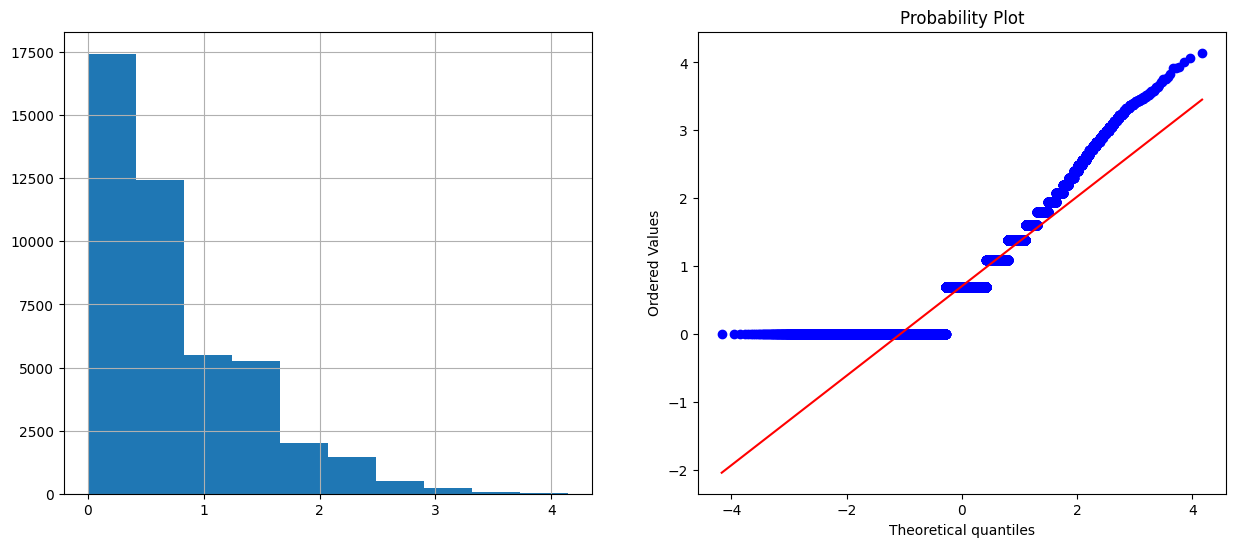

In [ ]:
df['campaign']=np.log(df['campaign'])
diagnostic_plots(df,'campaign')

In [ ]:
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1   # Interquartile range
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
outlier = df[(df['campaign'] > upper_lim) | (df['campaign'] < lower_lim)]
len(df['campaign']) - len(outlier)

44398

In [ ]:
df = df.drop(outlier.index)
# df = df.drop(df[df['campaign'] > upper_lim].index)
# df = df.drop(df[df['campaign'] < lower_lim].index)
# df['campaign'] = df['campaign'][~(df['campaign'] > upper_lim) | (df['campaign'] < lower_lim)].astype(int)
df['y'].value_counts()

no     39156
yes     5242
Name: y, dtype: int64

<AxesSubplot:xlabel='campaign', ylabel='y'>

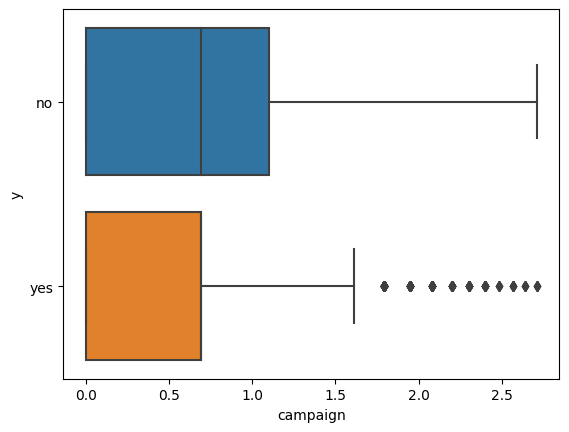

In [ ]:
sns.boxplot(x='campaign', y='y', data=df)

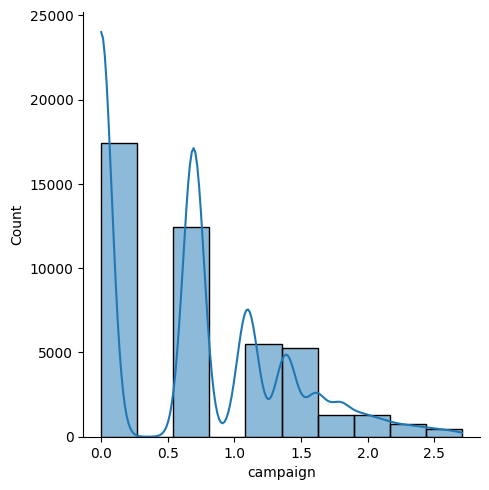

In [ ]:
sns.displot(df['campaign'], bins=10 , kde=True)

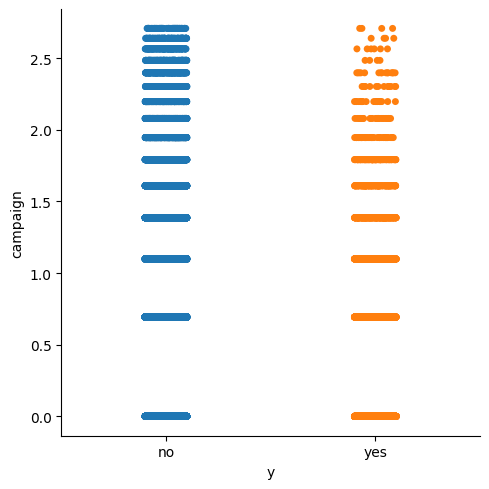

In [ ]:
sns.catplot(x= 'y',y='campaign', data=df) # plot relationship between data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = df.iloc[:,12:13] 
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_train)
print("model score: %.3f" % clf.score(x_test, y_test))

ValueError: at least one array or dtype is required